#### Привет. Это мой JN для ЦПТ. Я старался сделать его максимально понятный для тех, кто только начинает знакомиться с теорией вероятностей и мат. статистикой. Надеюсь, он принесет знания.

In [3]:
from scipy.stats import chi2
from  scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean

In [4]:
k = 55

Сгенерируем выборку объема 1000.

In [5]:
r = chi2.rvs(k, size=1000)

Теперь изобразим на одном графике функцию плотности вероятности и гистограмму распределения значений в выборке из 1000 чисел.

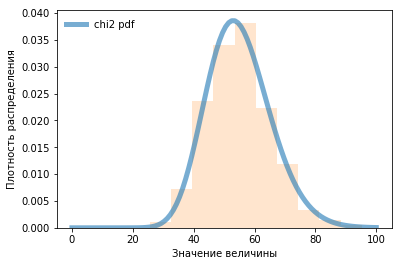

In [6]:
%matplotlib inline
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 100, num=100)

# Функция плотности вероятности.
ax.plot(x, chi2.pdf(x, k), lw=5, alpha=0.6, label='chi2 pdf')

# Гистограмма распределения значений выборки.
ax.hist(r, density=True, histtype='stepfilled', alpha = 0.2)

ax.legend(loc='best', frameon=False)
plt.xlabel('Значение величины')
plt.ylabel('Плотность распределения')
plt.show()

Как видно из предыдущей выборки - графики совпадают, чего и следовало ожидать.

Выборочное среднее рассчитывается как среднее арифметическое значений выборки. Составим массив средних значений для выборок различных объемов, повторив операцию 1000 раз.

In [7]:
# Для выборки объемом 5.
means5 = [chi2.rvs(k, size=5).mean() for i in range(0, 1000)]

# Для выборки объемом 10.
means10 = [chi2.rvs(k, size=10).mean() for i in range(0, 1000)]

# Для выборки объемом 50.
means50 = [chi2.rvs(k, size=50).mean() for i in range(0, 1000)]

`S^2 = (1 / (n - 1)) * D`,

где D - диспресия генеральной совокупности (равна `2k = 2 * 55 = 110`)

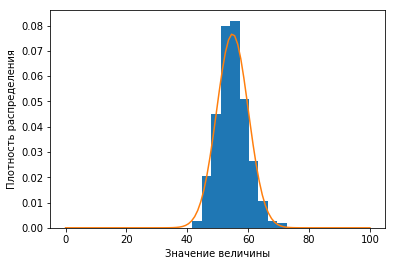

In [8]:
%matplotlib inline
x = np.linspace(0, 100, num=100)

plt.hist(means5, density=True)

# Диспресия равна sqrt(1 / (5 - 1) * 110) = 5.2, матожидание это выборочное среднее (использована функция mean()).
plt.plot(x, norm(mean(means5), 5.2).pdf(x))

plt.xlabel('Значение величины')
plt.ylabel('Плотность распределения')
plt.show()

Теперь проведем те же действия для выборок объемом 10 и 50.

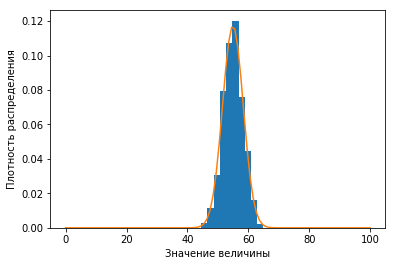

In [10]:
%matplotlib inline
x = np.linspace(0, 100, num=100)

plt.hist(means10, density=True)

# Диспресия равна sqrt(1 / (10 - 1) * 110) = 3.4, матожидание это выборочное среднее (использована функция mean()).
plt.plot(x, norm(mean(means10), 3.4).pdf(x))

plt.xlabel('Значение величины')
plt.ylabel('Плотность распределения')
plt.show()

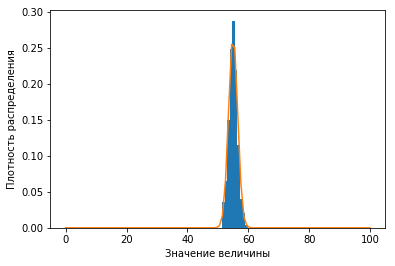

In [11]:
%matplotlib inline
x = np.linspace(0, 100, num=100)

plt.hist(means50, density=True)

# Диспресия равна sqrt(1 / (50 - 1) * 110) = 1.49, матожидание это выборочное среднее (использована функция mean()).
plt.plot(x, norm(mean(means50), 1.49).pdf(x))

plt.xlabel('Значение величины')
plt.ylabel('Плотность распределения')
plt.show()

**Вывод: можно заметить как точность аппроксимации увеличивается с ростом числа объектов выборки. Выборка объемом 50 явно является наиболее точно аппроксимируется, что означает, что центральная предельная теорема работает эффективнее в этом случае.**